In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.cm import tab10, tab20c,tab20b
import pickle
import itertools

In [6]:
def draw_stackplot(ax,df,f_title,l_title,ylabel,xlabel,colors,figsize=(14,9)):
    ax.stackplot(df.columns,df.values,labels=df.index,colors=colors)
    ax.legend(title=l_title,fancybox=False,edgecolor="black",bbox_to_anchor=(1.0,1.01),loc="upper left",fontsize=14,title_fontsize=14)
    ax.set_xlim(df.columns.min(),df.columns.max())
    #ax.set_ylim(
    ax.set_ylabel(ylabel,fontsize=14)
    ax.set_xlabel(xlabel,fontsize=14)
    ax.set_title(f_title,fontsize=16)
    plt.tight_layout()

In [2]:
solution_df_state = pd.read_csv("state_model_solution_ydf.csv",low_memory=False,header=[0,1,2,3,4,5])
solution_df_state.columns.names = ['seir', 'age', 'vacc', 'variant', 'immun', 'region']

In [3]:
with open("solution_df_con.pkl","rb") as f:
    solution_df = pickle.load(f)

In [4]:
solution_df.set_index(pd.date_range("2020-01-24",periods=len(solution_df)),inplace=True)
solution_df_state.set_index(pd.date_range("2020-01-24",periods=len(solution_df)),inplace=True)

In [5]:
solution_df = solution_df.iloc[:767]
solution_df_state = solution_df_state.iloc[:767]

# SEIR Compartments

In [9]:
seir_regional = solution_df.groupby(level="seir",axis=1).sum().T
seir_state = solution_df_state.groupby(level="seir",axis=1).sum().T

4060627.000000002

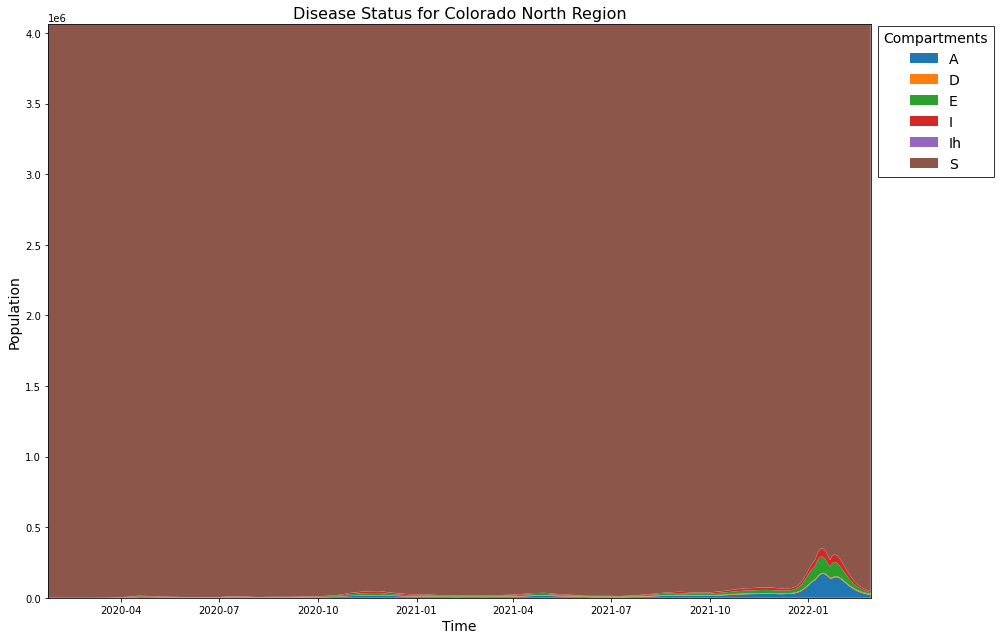

In [15]:
fig,ax = plt.subplots(figsize=(14,9))
draw_stackplot(ax=ax,
               df=seir_regional,
               f_title="Disease Status for Colorado North Region",
               l_title="Compartments",
               xlabel="Time",
               ylabel="Population",
               colors=[tab10(i) for i in range(seir_regional.index.nunique())])
ax.set_ylim(0,seir_regional.sum().max())
plt.savefig("disease_status_regional.png")

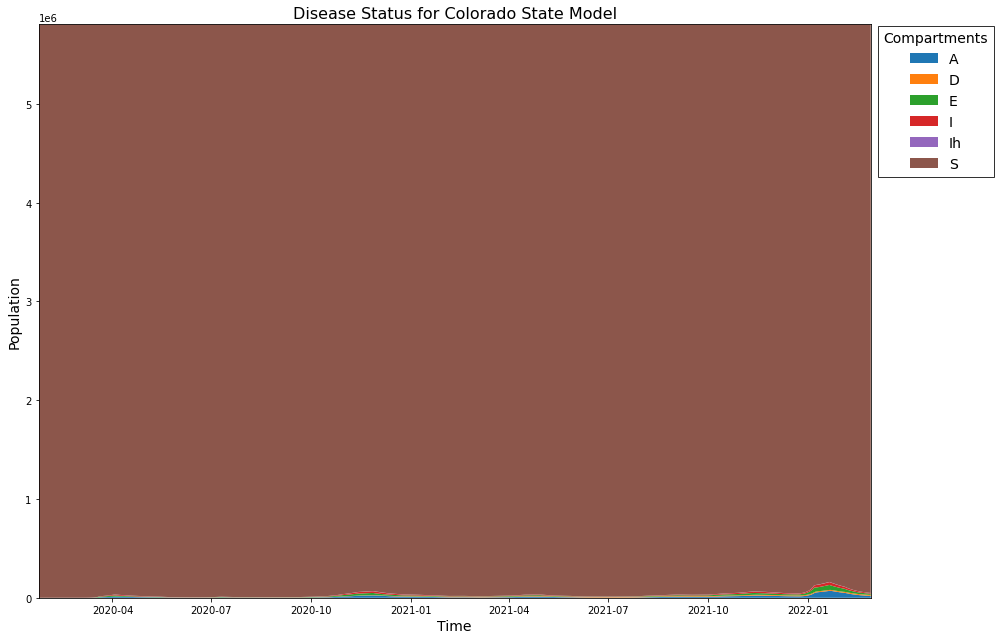

In [16]:
fig,ax = plt.subplots(figsize=(14,9))
draw_stackplot(ax=ax,
               df=seir_state,
               f_title="Disease Status for Colorado State Model",
               l_title="Compartments",
               xlabel="Time",
               ylabel="Population",
               colors=[tab10(i) for i in range(seir_regional.index.nunique())])
ax.set_ylim(0,seir_state.sum().max())
plt.savefig("disease_status_state.png")

# Vaccination Status

In [24]:
vacc_regional = solution_df.groupby(level=["vacc","age"],axis=1).sum().T
vacc_state = solution_df_state.groupby(level=["vacc","age"],axis=1).sum().T

In [49]:
# We use gray for the none vaccination status, and colors otherwise
colors = []
color_groups = np.array([0,1,4,2,3])
for vacc,cgrp in zip(vacc_regional.index.get_level_values("vacc").unique(),color_groups):
    for j,age in enumerate(vacc_regional.index.get_level_values("age").unique()):
        colors.append(tab20c((cgrp*4)+j))

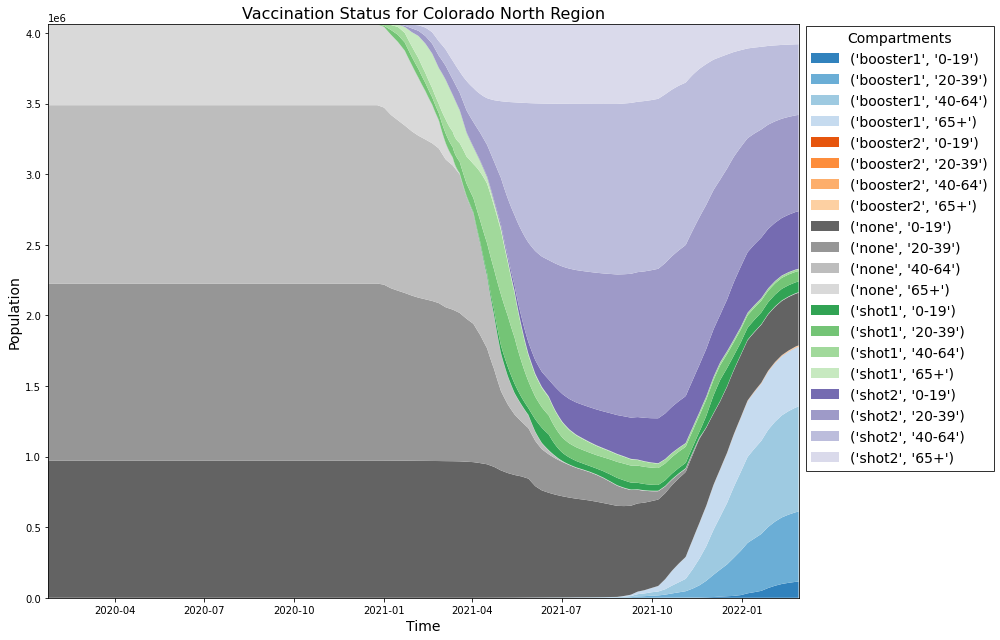

In [50]:
fig,ax = plt.subplots(figsize=(14,9))
draw_stackplot(ax=ax,
               df=vacc_regional,
               f_title="Vaccination Status for Colorado North Region",
               l_title="Compartments",
               xlabel="Time",
               ylabel="Population",
               colors=colors)
ax.set_ylim(0,vacc_regional.sum().max())
plt.savefig("vacc_status_regional.png")

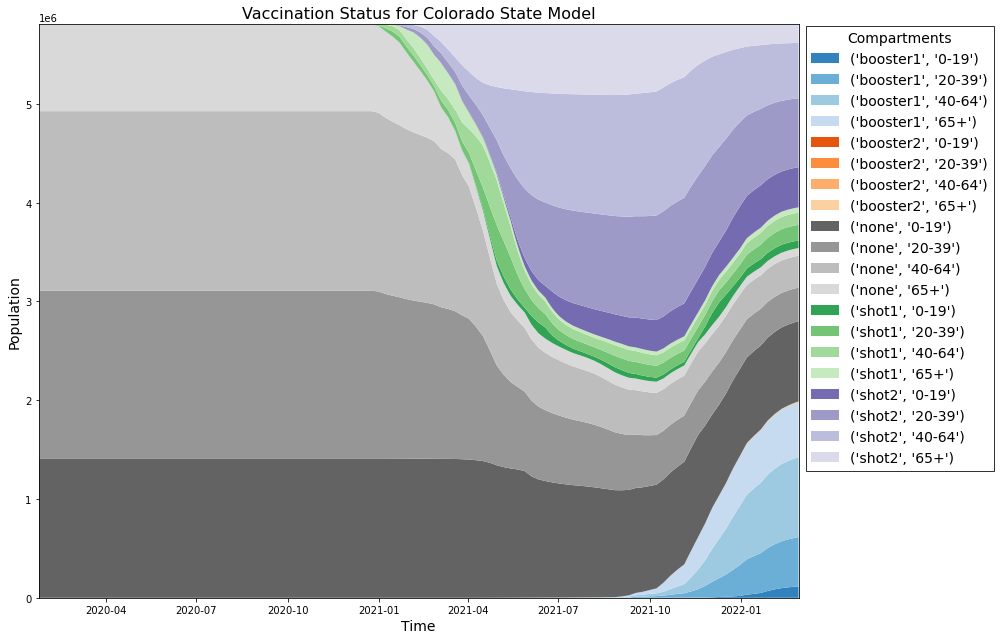

In [52]:
fig,ax = plt.subplots(figsize=(14,9))
draw_stackplot(ax=ax,
               df=vacc_state,
               f_title="Vaccination Status for Colorado State Model",
               l_title="Compartments",
               xlabel="Time",
               ylabel="Population",
               colors=colors)
ax.set_ylim(0,vacc_state.sum().max())
plt.savefig("vacc_status_state.png")

# Variant Distribution

In [68]:
plot_v = solution_df.drop(axis=1,level="seir",labels=["S","E"]).groupby(level=["variant"],axis=1).sum().T
plot_v = plot_v.divide(plot_v.sum(axis=0))
plot_v.loc["none",plot_v.loc["none",:].isna()] = 1.0
plot_v.fillna(0.0,inplace=True)

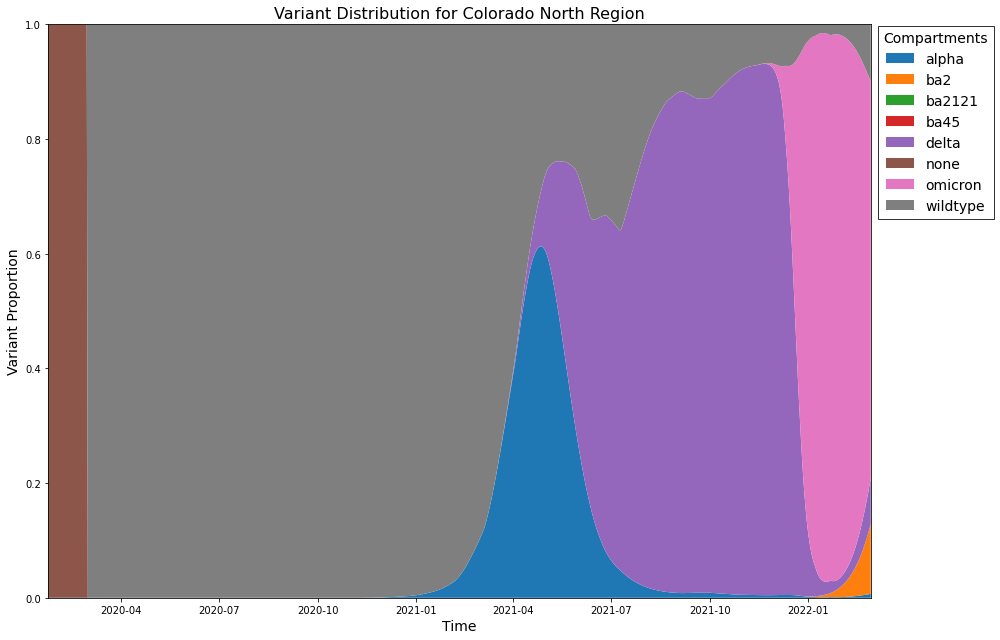

In [69]:
# Plot immunity
fig,ax = plt.subplots(figsize=(14,9))
draw_stackplot(ax=ax,
               df=plot_v,
               f_title="Variant Distribution for Colorado North Region",
               l_title="Compartments",
               ylabel="Variant Proportion",
               xlabel="Time",
               colors=[tab10(i) for i in range(plot_v.index.nunique())])
ax.set_ylim(0,1)
plt.savefig("variant_proportion_con.png")
# ax.stackplot(plot_v.columns,plot_v.values,labels=plot_v.index,colors=colors)
# ax.legend(title="Compartments",fancybox=False,edgecolor="black",bbox_to_anchor=(1.0,1.01),loc="upper left",fontsize=14,title_fontsize=14)
# ax.set_xlim(plot_v.columns.min(),plot_v.columns.max())
# #ax[1].set_ylim(0,1)
# ax.set_ylabel("Population",fontsize=14)
# ax.set_title("Variant Distribution for Colorado North Region",fontsize=16)
# ax.set_xlabel("Time",fontsize=14)
# plt.tight_layout()
#plt.savefig("immunity_comparison.png")

In [70]:
plot_v_state = solution_df_state.drop(axis=1,level="seir",labels=["S","E"]).groupby(level=["variant"],axis=1).sum().T
plot_v_state = plot_v_state.divide(plot_v_state.sum(axis=0))
plot_v_state.loc["none",plot_v_state.loc["none",:].isna()] = 1.0
plot_v_state.fillna(0.0,inplace=True)

In [71]:
plot_v_state

,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,...,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28
variant,,,,,,,,,,,,,,,,,,,,,
alpha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007667,0.007893,0.008118,0.008339,0.008558,0.008774,0.008986,0.009195,9.399903e-03,0.009601
ba2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.492067,0.502131,0.511658,0.520639,0.529067,0.536943,0.544268,0.551048,5.572974e-01,0.563010
ba2121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.708140e-08,0.000030
ba45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
delta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.104379,0.105846,0.107361,0.108917,0.110509,0.112131,0.113777,0.115442,1.171199e-01,0.118802
none,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
omicron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.286936,0.271961,0.257509,0.243602,0.230254,0.217477,0.205276,0.193653,1.826059e-01,0.172123
wildtype,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.108951,0.112169,0.115354,0.118503,0.121611,0.124676,0.127693,0.130662,1.335769e-01,0.136433


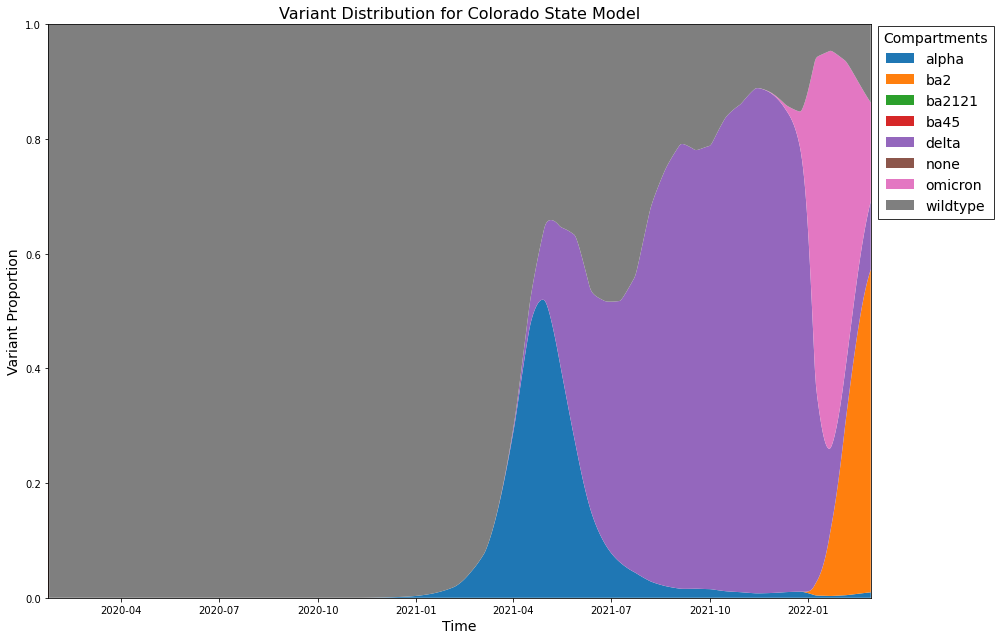

In [72]:
fig,ax = plt.subplots(figsize=(14,9))
draw_stackplot(ax=ax,
               df=plot_v_state,
               f_title="Variant Distribution for Colorado State Model",
               l_title="Compartments",
               ylabel="Variant Proportion",
               xlabel="Time",
               colors=[tab10(i) for i in range(plot_v.index.nunique())])
ax.set_ylim(0,1)
plt.savefig("variant_proportion_state.png")

In [ ]:
# Plot immunity
plot_v = solution_df.groupby(axis=1,level=["immun","age"]).sum().T
fig,ax = plt.subplots(figsize=(29,9),ncols=2,sharex=True,sharey=True)
ax[0].stackplot(plot_v.columns,plot_v.values,labels=plot_v.index,colors=[tab20c(i) for i in np.arange(12)])
ax[0].legend(title="Compartments",fancybox=False,edgecolor="black",bbox_to_anchor=(1.0,1.01),loc="upper left",fontsize=14,title_fontsize=14)
ax[0].set_xlim(plot_v.columns.min(),plot_v.columns.max())
#ax[0].set_ylim(0,1)
ax[0].set_ylabel("Population",fontsize=14)
ax[0].set_title("Immunity/Age for Colorado North Region",fontsize=16)
ax[0].set_xlabel("Time",fontsize=14)
plot_v_seed = solution_df_seed_mod.groupby(axis=1,level=["immun","age"]).sum().T
ax[1].stackplot(plot_v_seed.columns,plot_v_seed.values,labels=plot_v_seed.index,colors=[tab20c(i) for i in np.arange(12)])
ax[1].legend(title="Compartments",fancybox=False,edgecolor="black",bbox_to_anchor=(1.0,1.01),loc="upper left",fontsize=14,title_fontsize=14)
ax[1].set_xlim(plot_v_seed.columns.min(),plot_v_seed.columns.max())
#ax[1].set_ylim(0,1)
ax[1].set_ylabel("Population",fontsize=14)
ax[1].set_title("Immunity/Age for Colorado North Region (modified seeding)",fontsize=16)
ax[1].set_xlabel("Time",fontsize=14)
plt.tight_layout()
plt.savefig("immunity_comparison.png")

In [ ]:
tmp_1 = solution_df_norm.groupby(axis=1,level=["age","immun"]).sum().cumsum()
plot_v = tmp_1.divide(tmp_1.sum(axis=1),axis=0).T
colors = []
for i,age in enumerate(plot_v.index.get_level_values("age").unique()):
    for j,immun in enumerate(plot_v.index.get_level_values("immun").unique()):
        colors.append(tab20c((4*i)+j))
fig,ax = plt.subplots(figsize=(14,9))
ax.stackplot(plot_v.columns,plot_v.values,labels=plot_v.index,colors=colors)
ax.legend(title="Compartments",fancybox=False,edgecolor="black",bbox_to_anchor=(1.0,1.01),loc="upper left",fontsize=14,title_fontsize=14)
ax.set_xlim(plot_v.columns.min(),plot_v.columns.max())
#ax.set_ylim(0,int(solution_df.sum(axis=1).max()))
ax.set_ylim(0,1)
ax.set_ylabel("Population",fontsize=14)
ax.set_title("Immunity/Age for Colorado State Model",fontsize=16)
ax.set_xlabel("Time",fontsize=14)
plt.tight_layout()
plt.savefig("state_model/immunity_time_2_cumulative.png")

In [ ]:
for elem in ["seir","age","vacc","variant","immun"]:
    if elem == "variant":
        plot_v = solution_df_norm.drop(level="seir",labels=["S","E"],axis=1).groupby(axis=1,level=elem).sum().T
        plot_v = plot_v.cumsum(axis=1)
        
    else:
        plot_v = solution_df_norm.groupby(axis=1,level=elem).sum().T
    plot_stack(plot_v,elem,title="state_model/"+elem+"_con",lg_title="Compartment")

In [ ]:
solution_df_norm.groupby(axis=1,level=["seir","immun"]).sum().T.iloc[:,::-1]